# Machine Learning Classifier

##Combines to datasets of unlabeled features and determines whether a beverage is imported or not. 

In [3]:
# general libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#dependancy, might have to install 
import seaborn as sns 

#data processing
from sklearn.model_selection import train_test_split , cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler  
#models 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm #other model I have chosen, (dependancy, might have to install)

#evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix



#### Load the local-beverage.csv and the importe-beverage.csv

In [4]:
#get data  
data_local = pd.read_csv('local-beverage.csv') 
data_imported = pd.read_csv('imported-beverage.csv') 


In [5]:
#display Info and stats 
data_local.head() 

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,score
0,NaN,0.70,0.00,1.9,0.68,0.076,11.0,34.0,23,0.9978,3.51,94,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.83,0.098,25.0,67.0,34,0.9968,3.20,68,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.98,0.092,15.0,54.0,41,0.9970,3.26,92,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.78,0.075,17.0,60.0,49,0.9980,3.16,42,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.54,0.076,11.0,34.0,17,0.9978,3.51,47,0.56,9.4,5


In [6]:
data_local.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,score
count,1565.000000,1599.000000,1587.000000,1599.000000,1599.000000,1599.000000,1599.000000,1582.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.326006,0.527821,0.270580,2.538806,0.751964,0.087467,15.874922,46.670038,30.423390,0.996747,3.311113,50.341463,0.658149,10.422983,5.636023
std,1.752268,0.179060,0.194997,1.409928,0.139608,0.047065,10.460157,32.925992,11.998393,0.001887,0.154386,29.707771,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.540000,0.012000,1.000000,6.000000,10.000000,0.990070,2.740000,0.000000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.630000,0.070000,7.000000,22.000000,20.000000,0.995600,3.210000,25.000000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.730000,0.079000,14.000000,38.000000,31.000000,0.996750,3.310000,51.000000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.880000,0.090000,21.000000,62.750000,41.000000,0.997835,3.400000,77.000000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.980000,0.611000,72.000000,289.000000,50.000000,1.003690,4.010000,100.000000,2.000000,14.900000,8.000000


In [7]:
data_local.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1565 non-null   float64
 1   feature_2   1599 non-null   float64
 2   feature_3   1587 non-null   float64
 3   feature_4   1599 non-null   float64
 4   feature_5   1599 non-null   float64
 5   feature_6   1599 non-null   float64
 6   feature_7   1599 non-null   float64
 7   feature_8   1582 non-null   float64
 8   feature_9   1599 non-null   int64  
 9   feature_10  1599 non-null   float64
 10  feature_11  1599 non-null   float64
 11  feature_12  1599 non-null   int64  
 12  feature_13  1599 non-null   float64
 13  feature_14  1599 non-null   float64
 14  score       1599 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 187.5 KB


In [8]:
data_imported.head() 

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,score
0,7.0,0.27,0.36,20.7,0.6,0.045,45.0,170.0,37,1.0010,3.00,66,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.9,0.049,14.0,132.0,40,0.9940,3.30,17,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.5,0.050,30.0,97.0,18,0.9951,3.26,85,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.6,0.058,47.0,186.0,18,0.9956,3.19,62,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.7,0.058,47.0,186.0,34,0.9956,3.19,96,0.40,9.9,6


In [9]:
data_imported.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,score
count,4898.000000,4868.000000,4898.000000,4898.000000,4898.000000,4898.000000,4857.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4879.000000,4898.000000,4898.000000
mean,6.854788,0.278215,0.334192,6.391415,0.748295,0.045772,35.334775,138.360657,30.007554,0.994027,3.188267,50.307677,0.489934,10.514267,5.877909
std,0.843868,0.100547,0.121020,5.072058,0.158715,0.021848,17.027788,42.498065,11.797529,0.002991,0.151001,29.340012,0.114203,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.500000,0.009000,2.000000,9.000000,10.000000,0.987110,2.720000,0.000000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.600000,0.036000,23.000000,108.000000,20.000000,0.991723,3.090000,25.000000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.750000,0.043000,34.000000,134.000000,30.000000,0.993740,3.180000,51.000000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.900000,0.050000,46.000000,167.000000,40.000000,0.996100,3.280000,76.000000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,1.000000,0.346000,289.000000,440.000000,50.000000,1.038980,3.820000,100.000000,1.080000,14.200000,9.000000


In [10]:
data_imported.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   4898 non-null   float64
 1   feature_2   4868 non-null   float64
 2   feature_3   4898 non-null   float64
 3   feature_4   4898 non-null   float64
 4   feature_5   4898 non-null   float64
 5   feature_6   4898 non-null   float64
 6   feature_7   4857 non-null   float64
 7   feature_8   4898 non-null   float64
 8   feature_9   4898 non-null   int64  
 9   feature_10  4898 non-null   float64
 10  feature_11  4898 non-null   float64
 11  feature_12  4898 non-null   int64  
 12  feature_13  4879 non-null   float64
 13  feature_14  4898 non-null   float64
 14  score       4898 non-null   int64  
dtypes: float64(12), int64(3)
memory usage: 574.1 KB


#before we can combine the data we need to create our label. 
#the label will be: production_type 
it will have 2 values: 0 and 1 
0 will denote a local production type and 1 will denote an imported production type  

In [11]:
data_local["production_type"]  = 0  #create binary column to determine imported or local 

In [12]:
data_local.tail() #local is denoted as 0 imported is denoted as 1

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,score,production_type
1594,6.2,0.600,0.08,2.0,0.54,0.090,32.0,44.0,29,0.99490,3.45,75,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.59,0.062,39.0,51.0,42,0.99512,3.52,80,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.83,0.076,29.0,40.0,39,0.99574,3.42,85,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.59,0.075,32.0,44.0,43,0.99547,3.57,81,0.71,10.2,5,0
1598,6.0,0.310,0.47,3.6,0.88,0.067,18.0,42.0,11,0.99549,3.39,18,0.66,11.0,6,0


In [13]:
data_local.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,score,production_type
count,1565.000000,1599.000000,1587.000000,1599.000000,1599.000000,1599.000000,1599.000000,1582.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.0
mean,8.326006,0.527821,0.270580,2.538806,0.751964,0.087467,15.874922,46.670038,30.423390,0.996747,3.311113,50.341463,0.658149,10.422983,5.636023,0.0
std,1.752268,0.179060,0.194997,1.409928,0.139608,0.047065,10.460157,32.925992,11.998393,0.001887,0.154386,29.707771,0.169507,1.065668,0.807569,0.0
min,4.600000,0.120000,0.000000,0.900000,0.540000,0.012000,1.000000,6.000000,10.000000,0.990070,2.740000,0.000000,0.330000,8.400000,3.000000,0.0
25%,7.100000,0.390000,0.090000,1.900000,0.630000,0.070000,7.000000,22.000000,20.000000,0.995600,3.210000,25.000000,0.550000,9.500000,5.000000,0.0
50%,7.900000,0.520000,0.260000,2.200000,0.730000,0.079000,14.000000,38.000000,31.000000,0.996750,3.310000,51.000000,0.620000,10.200000,6.000000,0.0
75%,9.200000,0.640000,0.420000,2.600000,0.880000,0.090000,21.000000,62.750000,41.000000,0.997835,3.400000,77.000000,0.730000,11.100000,6.000000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.980000,0.611000,72.000000,289.000000,50.000000,1.003690,4.010000,100.000000,2.000000,14.900000,8.000000,0.0


In [14]:
data_local.nunique()

feature_1           96
feature_2          143
feature_3           80
feature_4           91
feature_5           10
feature_6          153
feature_7           60
feature_8          144
feature_9           41
feature_10         436
feature_11          89
feature_12         101
feature_13          96
feature_14          65
score                6
production_type      1
dtype: int64

In [15]:
data_imported.shape #stats 

(4898, 15)

In [16]:
data_local.shape #stats

(1599, 16)

In [17]:
dataset = pd.concat([data_local, data_imported]) 
#combining the datasets imported and local 

In [18]:
dataset.tail() 
#concatenating the datasets basically put them on top of each other. we did not specify a value for the production type
#column in the imported dataset hence it has a NaN value. 
#this means that the concatenating process was sucessfull 

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,score,production_type
4893,6.2,0.21,0.29,1.6,0.70,0.039,24.0,92.0,44,0.99114,3.27,67,0.50,11.2,6,NaN
4894,6.6,0.32,0.36,8.0,0.65,0.047,57.0,168.0,30,0.99490,3.15,96,0.46,9.6,5,NaN
4895,6.5,0.24,0.19,1.2,0.50,0.041,30.0,111.0,33,0.99254,2.99,87,0.46,9.4,6,NaN
4896,5.5,0.29,0.30,1.1,0.75,0.022,20.0,110.0,38,0.98869,3.34,35,0.38,12.8,7,NaN
4897,6.0,0.21,0.38,0.8,0.80,0.020,22.0,98.0,18,0.98941,3.26,97,0.32,11.8,6,NaN


In [19]:
dataset.shape #imported had 4898 rows and local had 1599 (4898 + 1599 = 6497) 
#we now know all rows from both datasets have combined into 1 dataset 

(6497, 16)

In [20]:
# earlier we have specified that local be '1', imported has a value of NaN currently, let us make it '1'
dataset['production_type']= dataset['production_type'].fillna(1) 

In [21]:
dataset.tail()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,score,production_type
4893,6.2,0.21,0.29,1.6,0.70,0.039,24.0,92.0,44,0.99114,3.27,67,0.50,11.2,6,1.0
4894,6.6,0.32,0.36,8.0,0.65,0.047,57.0,168.0,30,0.99490,3.15,96,0.46,9.6,5,1.0
4895,6.5,0.24,0.19,1.2,0.50,0.041,30.0,111.0,33,0.99254,2.99,87,0.46,9.4,6,1.0
4896,5.5,0.29,0.30,1.1,0.75,0.022,20.0,110.0,38,0.98869,3.34,35,0.38,12.8,7,1.0
4897,6.0,0.21,0.38,0.8,0.80,0.020,22.0,98.0,18,0.98941,3.26,97,0.32,11.8,6,1.0


In [22]:
dataset.nunique() 
#now we can confirm that our production_type has 2 unique values (0 and 1)

feature_1          106
feature_2          187
feature_3           89
feature_4          316
feature_5           21
feature_6          214
feature_7          134
feature_8          276
feature_9           41
feature_10         998
feature_11         108
feature_12         101
feature_13         111
feature_14         111
score                7
production_type      2
dtype: int64

Just as a reminder 0 is for local and 1 is for imported. 

In [23]:
dataset.dtypes

feature_1          float64
feature_2          float64
feature_3          float64
feature_4          float64
feature_5          float64
feature_6          float64
feature_7          float64
feature_8          float64
feature_9            int64
feature_10         float64
feature_11         float64
feature_12           int64
feature_13         float64
feature_14         float64
score                int64
production_type    float64
dtype: object

In [24]:
dataset.isnull().sum() 
#the column names are the same, so it is possible to handle all missing data using the 1 big dataset instead of doing it 2 separate times for local and imported 

feature_1          34
feature_2          30
feature_3          12
feature_4           0
feature_5           0
feature_6           0
feature_7          41
feature_8          17
feature_9           0
feature_10          0
feature_11          0
feature_12          0
feature_13         19
feature_14          0
score               0
production_type     0
dtype: int64

In [25]:
#handle all the missing data 
dataset['feature_1'] = dataset['feature_1'].fillna(dataset['feature_1'].mean()) 
dataset['feature_2'] = dataset['feature_2'].fillna(dataset['feature_2'].mean()) 
dataset['feature_3'] = dataset['feature_3'].fillna(dataset['feature_3'].mean()) 
dataset['feature_7'] = dataset['feature_7'].fillna(dataset['feature_7'].mean()) 
dataset['feature_8'] = dataset['feature_8'].fillna(dataset['feature_8'].mean()) 
dataset['feature_13'] = dataset['feature_13'].fillna(dataset['feature_13'].mean()) 


In [26]:
dataset.isnull().sum()

feature_1          0
feature_2          0
feature_3          0
feature_4          0
feature_5          0
feature_6          0
feature_7          0
feature_8          0
feature_9          0
feature_10         0
feature_11         0
feature_12         0
feature_13         0
feature_14         0
score              0
production_type    0
dtype: int64

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,score,production_type
feature_1,1.000000,0.216105,0.324347,-0.110680,0.000735,0.296604,-0.280608,-0.322969,0.004032,0.456226,-0.253399,-0.010956,0.297740,-0.094457,-0.076447,-0.482340
feature_2,0.216105,1.000000,-0.377603,-0.196872,-0.015611,0.377356,-0.351990,-0.411869,0.001696,0.270778,0.263006,-0.012534,0.226389,-0.037457,-0.265294,-0.653314
feature_3,0.324347,-0.377603,1.000000,0.142665,0.016994,0.039920,0.133868,0.194199,-0.018557,0.096146,-0.329503,-0.007904,0.056560,-0.011060,0.083830,0.187708
feature_4,-0.110680,-0.196872,0.142665,1.000000,-0.000606,-0.128940,0.402562,0.494519,-0.004652,0.552517,-0.267320,-0.003615,-0.186117,-0.359415,-0.036980,0.348821
feature_5,0.000735,-0.015611,0.016994,-0.000606,1.000000,0.004086,0.005952,-0.006337,-0.005221,0.003259,0.005493,-0.005136,-0.016395,-0.000894,0.011023,-0.010246
feature_6,0.296604,0.377356,0.039920,-0.128940,0.004086,1.000000,-0.195160,-0.277714,0.019714,0.362615,0.044708,-0.007635,0.395155,-0.256916,-0.200666,-0.512678
feature_7,-0.280608,-0.351990,0.133868,0.402562,0.005952,-0.195160,1.000000,0.717219,-0.019900,0.024991,-0.146076,-0.019006,-0.188127,-0.179615,0.054178,0.472252
feature_8,-0.322969,-0.411869,0.194199,0.494519,-0.006337,-0.277714,0.717219,1.000000,-0.014887,0.035369,-0.237233,-0.011004,-0.274844,-0.267647,-0.043289,0.695574
feature_9,0.004032,0.001696,-0.018557,-0.004652,-0.005221,0.019714,-0.019900,-0.014887,1.000000,0.004694,0.004307,0.006719,0.008898,0.005366,0.003775,-0.015120
feature_10,0.456226,0.270778,0.096146,0.552517,0.003259,0.362615,0.024991,0.035369,0.004694,1.000000,0.011686,-0.003160,0.258848,-0.686745,-0.305858,-0.390645


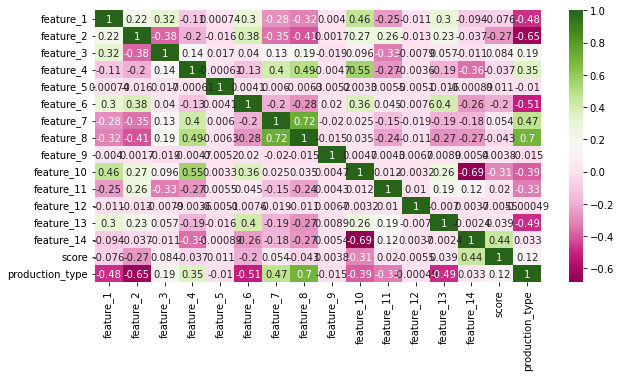

In [27]:
#exploring the data, looking at corelations
plt.figure(figsize=(10,5))
corelation = dataset.corr() #get corelation table
sns.heatmap(corelation, cmap= 'PiYG',annot =True)
corelation #display corelation table 

In [28]:
cor = dataset[dataset.columns[0:]].corr()['production_type'] #get the corelation between all features and the label (production_type)

print(cor.abs().sort_values())
#shows that features: 12, 5, 9, 14 have little corelation , meaning that they will not have an impact on our target 

feature_12         0.000495
feature_5          0.010246
feature_9          0.015120
feature_14         0.032970
score              0.119323
feature_3          0.187708
feature_11         0.329129
feature_4          0.348821
feature_10         0.390645
feature_7          0.472252
feature_1          0.482340
feature_13         0.486887
feature_6          0.512678
feature_2          0.653314
feature_8          0.695574
production_type    1.000000
Name: production_type, dtype: float64


In [29]:
dataset.shape

(6497, 16)

In [30]:
#will be removing 4 features closest to 0 (low corelation) in both directions (positive and negative)
#therefore top 11 features will be features: 2,3,4,6,7,8,10,11,13,score 

data = dataset.drop(['feature_12','feature_5','feature_9','feature_14'], axis =1) #stored data in 'data', just to keep a copy of original dataset. 



In [31]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_6,feature_7,feature_8,feature_10,feature_11,feature_13,score,production_type
0,7.21104,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,0.0
1,7.80000,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,0.0
2,7.80000,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,0.0
3,11.20000,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,0.0
4,7.40000,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,0.0


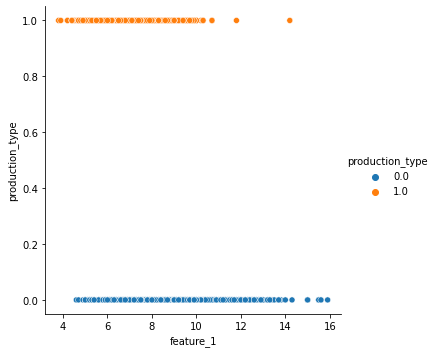

In [32]:
sns.relplot(x='feature_1' , y ='production_type', hue='production_type' , data = data)


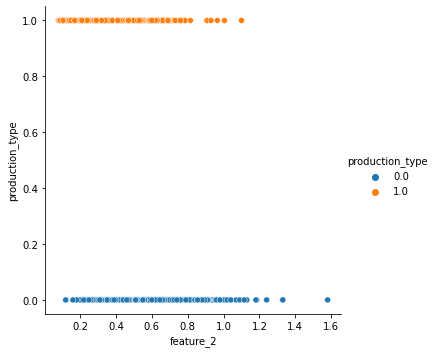

In [33]:
sns.relplot(x='feature_2' , y ='production_type', hue='production_type' , data = data)

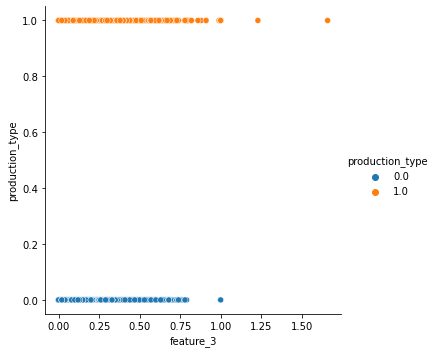

In [34]:
sns.relplot(x='feature_3' , y ='production_type', hue='production_type' , data = data) 

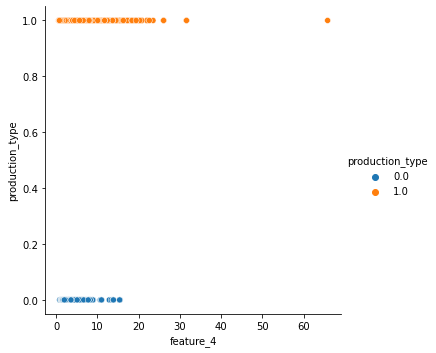

In [35]:
sns.relplot(x='feature_4' , y ='production_type', hue='production_type' , data = data) 

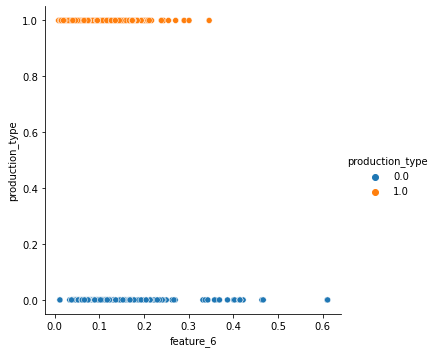

In [36]:
sns.relplot(x='feature_6' , y ='production_type', hue='production_type' , data = data) 

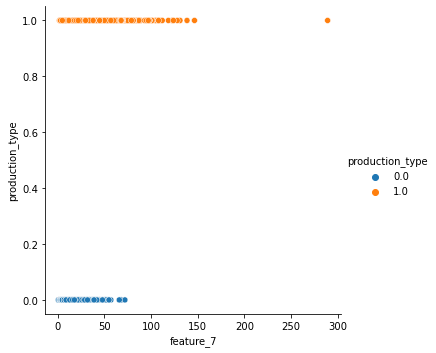

In [37]:
sns.relplot(x='feature_7' , y ='production_type', hue='production_type' , data = data) 

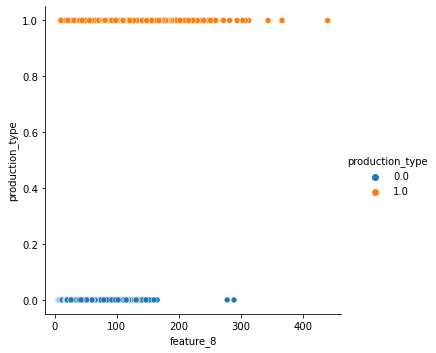

In [38]:
sns.relplot(x='feature_8' , y ='production_type', hue='production_type' , data = data) 

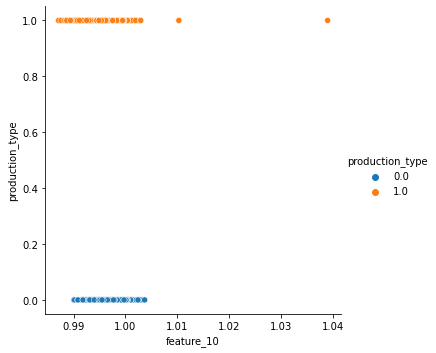

In [39]:
sns.relplot(x='feature_10' , y ='production_type', hue='production_type' , data = data) 

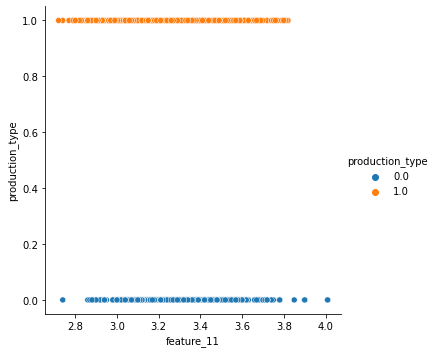

In [40]:
sns.relplot(x='feature_11' , y ='production_type', hue='production_type' , data = data) 

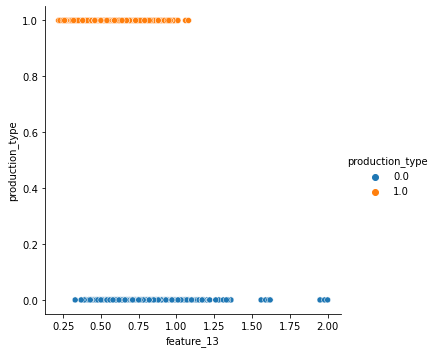

In [41]:
sns.relplot(x='feature_13' , y ='production_type', hue='production_type' , data = data) 

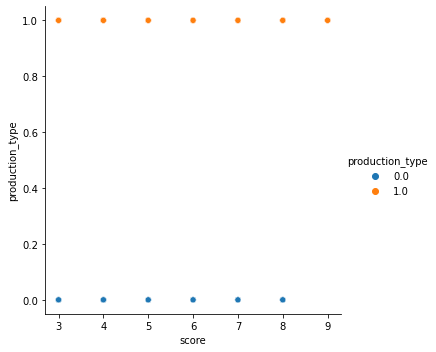

In [42]:
sns.relplot(x='score' , y ='production_type', hue='production_type' , data = data) 

In [43]:
#separate X(feature matrix) and y data (label) 
X = data.iloc[:,:-1].values #(feature matrix)
y = data.iloc[:,-1].values  # (label) 


In [44]:
print(X)

[[7.21103976 0.7        0.         ... 3.51       0.56       5.        ]
 [7.8        0.88       0.         ... 3.2        0.68       5.        ]
 [7.8        0.76       0.04       ... 3.26       0.65       5.        ]
 ...
 [6.5        0.24       0.19       ... 2.99       0.46       6.        ]
 [5.5        0.29       0.3        ... 3.34       0.38       7.        ]
 [6.         0.21       0.38       ... 3.26       0.32       6.        ]]


In [45]:
print(y)

[0. 0. 0. ... 1. 1. 1.]


In [46]:
 #get training and test data 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.25, random_state=1) 


In [47]:
print(Xtrain)

[[7.9   0.545 0.06  ... 3.36  0.67  6.   ]
 [8.8   0.2   0.43  ... 3.28  0.79  6.   ]
 [9.1   0.28  0.49  ... 3.15  0.46  5.   ]
 ...
 [7.    0.23  0.42  ... 3.5   0.59  6.   ]
 [7.2   0.63  0.    ... 3.37  0.58  6.   ]
 [5.7   0.22  0.22  ... 3.24  0.48  6.   ]]


In [48]:
print(Xtest)

[[7.6  0.32 0.58 ... 3.15 0.54 5.  ]
 [5.7  0.24 0.47 ... 3.11 0.46 5.  ]
 [7.6  0.36 0.44 ... 3.12 0.43 6.  ]
 ...
 [7.3  0.21 0.21 ... 3.38 0.46 6.  ]
 [6.6  0.62 0.2  ... 3.17 0.44 5.  ]
 [6.   0.29 0.27 ... 3.31 0.41 7.  ]]


In [49]:
print(ytrain)

[0. 1. 1. ... 1. 0. 1.]


In [50]:
print(ytest)

[1. 1. 1. ... 1. 1. 1.]


In [51]:
#scale our data so that it is in an optimal range for the model 
sc = StandardScaler() 
Xtrain_scaled = sc.fit_transform(Xtrain) 
Xtest_scaled = sc.transform(Xtest)  

## we do not have to scale our target because it is already in a binary form. 

In [52]:
print(Xtrain_scaled)

[[ 0.53714639  1.25352883 -1.78511505 ...  0.88089161  0.92043777
   0.19952289]
 [ 1.23745507 -0.85325977  0.77096781 ...  0.38134802  1.72659873
   0.19952289]
 [ 1.4708913  -0.36472908  1.18546773 ... -0.43041033 -0.49034391
  -0.93873882]
 ...
 [-0.16316229 -0.67006076  0.70188448 ...  1.75509291  0.38299713
   0.19952289]
 [-0.00753814  1.77259269 -2.19961497 ...  0.94333456  0.31581705
   0.19952289]
 [-1.17471927 -0.7311271  -0.67978192 ...  0.13157622 -0.35598375
   0.19952289]]


In [53]:
print(Xtest_scaled)

[[ 0.30371017 -0.12046373  1.80721761 ... -0.43041033  0.04709673
  -0.93873882]
 [-1.17471927 -0.60899442  1.04730109 ... -0.68018213 -0.49034391
  -0.93873882]
 [ 0.30371017  0.12380161  0.84005113 ... -0.61773918 -0.69188415
   0.19952289]
 ...
 [ 0.07027394 -0.79219343 -0.74886524 ...  1.00577751 -0.49034391
   0.19952289]
 [-0.47441059  1.71152635 -0.81794856 ... -0.30552443 -0.62470407
  -0.93873882]
 [-0.94128304 -0.30366274 -0.33436532 ...  0.56867687 -0.82624431
   1.3377846 ]]


In [54]:
# training the Log Reg Model, random state is 1 but can be changed, if fails to converge we can inc no of iterations. 
Classifier = LogisticRegression(random_state=1) 
Classifier.fit(Xtrain_scaled, ytrain) 


LogisticRegression(random_state=1)

In [55]:
# test our model using test data and compare to ytest (correct prediction values)
ypred = Classifier.predict(Xtest_scaled) 
print(np.concatenate((ypred.reshape(len(ypred),1),ytest.reshape(len(ytest),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [56]:
#training random forest classifier 
ClassifierRandomForest = RandomForestClassifier(n_estimators =100, criterion='entropy', random_state=0) 
ClassifierRandomForest.fit(Xtrain_scaled, ytrain) 


RandomForestClassifier(criterion='entropy', random_state=0)

In [57]:
#test random forest classifier 
ypredRandomForest = ClassifierRandomForest.predict(Xtest_scaled) 
print(np.concatenate((ypredRandomForest.reshape(len(ypredRandomForest),1),ytest.reshape(len(ytest),1)),1))

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [58]:
#train SVM model 
ClassifierSVM = svm.SVC() 
ClassifierSVM.fit(Xtrain_scaled, ytrain)

SVC()

In [59]:
#test SVM model 
ypredSVM = ClassifierSVM.predict(Xtest_scaled) 
print(np.concatenate((ypredSVM.reshape(len(ypredSVM),1),ytest.reshape(len(ytest),1)),1)) 

[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]


# Linear Regression Model Evaluation 



the accuracy of the Linear Regression Model: 0.9895384615384616
_____________________________________________________________________________
The confusion matrix: 


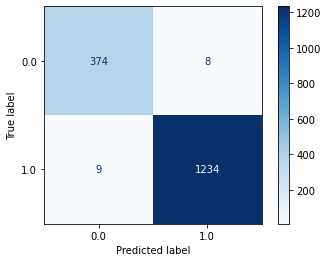

In [60]:
displayLR = plot_confusion_matrix(Classifier, Xtest_scaled, ytest,  cmap = 'Blues', values_format='')
print('the accuracy of the Linear Regression Model:', accuracy_score(ytest, ypred))
print('_____________________________________________________________________________')
print('The confusion matrix: ')

# Random forest classifier Evaluation 

the accuracy of the Random forest Classifier Model: 0.9913846153846154
_____________________________________________________________________________
The confusion matrix: 


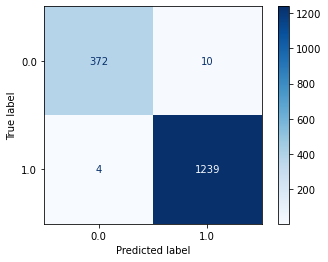

In [61]:
displayRF = plot_confusion_matrix(ClassifierRandomForest, Xtest_scaled, ytest,  cmap = 'Blues', values_format='')
print('the accuracy of the Random forest Classifier Model:', accuracy_score(ytest, ypredRandomForest))
print('_____________________________________________________________________________')
print('The confusion matrix: ')

# SVM classifier Evaluation

the accuracy of the SVM Classifier Model: 0.9944615384615385
_____________________________________________________________________________
The confusion matrix: 


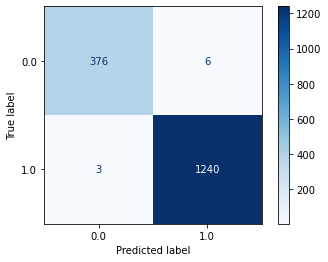

In [62]:
displaySVM = plot_confusion_matrix(ClassifierSVM, Xtest_scaled, ytest,  cmap = 'Blues', values_format='')
print('the accuracy of the SVM Classifier Model:', accuracy_score(ytest, ypredSVM))
print('_____________________________________________________________________________')
print('The confusion matrix: ')

# # comments on the performance of the models 

In [63]:
##in this project we have a special objective, to determine if the a beverage is imported or local.
#to start modelling I first had to combine the datasets 
# 3 models were used in this project. 

##Logistic Regression model###
#this model turned out to be the least accurate of 3 used
#this could be because I kept the max iterations at the default, I could have increased that number. 
#it could also be because of the train_test_split and random state. 

##Random Forest model ##
#this model is a bit more accurate, but this is to be expected because a random forest is essentially an aggregation of dec Trees
#However it could also be this accurate because the train_test_split worked in its favour. 

##Support Vector Machine Model (SVM) ## 
#The SVM is the other model that I chose. 
#upon training and testing it, it has turned out to be the most accurate model. 

#the accuracy obtained by the models however is not just based on the model used. 
#preprocessing techniques play a substantial role in accuracy, for example i can check for outliers and remove them 
# to see if that will have an effect on the accuracy 

#at present I can conclcude that the SVM is the best model for this dataset 



#### BONUS :Use Stratified K-Fold and cross-validation. Then reavaluate the model performances as before [15] 

## Cross-Validation applied to Linear Regression 

In [64]:
#performing cross validation method 
accuracy_LogisticRegression = cross_val_score(Classifier, Xtrain_scaled, ytrain, cv =10) 

print('The mean accuracy from the cross validation : ', accuracy_LogisticRegression.mean())  
print('The lowest accuracy from the cross validation:', accuracy_LogisticRegression.min())
print('The highest accuracy from the cross validation:', accuracy_LogisticRegression.max()) 


The mean accuracy from the cross validation :  0.9928156663412665
The lowest accuracy from the cross validation: 0.9835728952772074
The highest accuracy from the cross validation: 0.997946611909651


## Cross-Validation applied to Random forest model 

In [65]:
#performing cross validation to the random forest model 
accuracy_randomForest = cross_val_score(ClassifierRandomForest, Xtrain_scaled, ytrain, cv =10) 

print('The mean accuracy from the cross validation : ', accuracy_randomForest.mean())  
print('The lowest accuracy from the cross validation:', accuracy_randomForest.min())
print('The highest accuracy from the cross validation:', accuracy_randomForest.max()) 


The mean accuracy from the cross validation :  0.9940476991954759
The lowest accuracy from the cross validation: 0.9876796714579056
The highest accuracy from the cross validation: 0.997946611909651


## Cross-Validation applied to SVM model 

In [66]:
accuracy_SVM = cross_val_score(ClassifierSVM, Xtrain_scaled, ytrain, cv =10) 

print('The mean accuracy from the cross validation : ', accuracy_SVM.mean())  
print('The lowest accuracy from the cross validation:', accuracy_SVM.min())
print('The highest accuracy from the cross validation:', accuracy_SVM.max()) 


The mean accuracy from the cross validation :  0.9952784697209411
The lowest accuracy from the cross validation: 0.9897330595482546
The highest accuracy from the cross validation: 1.0


## Stratified K-fold Applied to linear Regression model 

In [67]:
X.dtype

dtype('float64')

In [68]:
skf = StratifiedKFold(n_splits = 10) #like cross validation we are splitting it 10 times 
accuracyLogReg=[] #our 10 accuracy elements will be placed here  

#get xtrain, xtest, ytrain and ytest again with diff method than train_test_split
# that is why we using original X and y values not the training set and scaled set hence X1 and y1 

skf.get_n_splits(X, y) #splitting the dataset by specifying X1 - features y1 - target 
for train_index, test_index in skf.split(X, y): 
    print('Train:' , train_index , 'Test', test_index) 
    x1train , x1test = X[train_index] , X[test_index] 
    y1train, y1test = y[train_index], y[test_index] 
    
    Classifier.fit(x1train, y1train) # new training data for predicting the model 
    pred = Classifier.predict(x1test) # now we test using data obtained from S-Kfold 
    score = accuracy_score(pred, y1test) #compare the 2 
    accuracyLogReg.append(score) # add to the list
    




Train: [ 160  161  162 ... 6494 6495 6496] Test [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159 1599 1600 1601 1602 1603 1604 1605 1606
 1607 1608 1609 1610 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620
 1621 1622 1623 1624 1625 162

C:\Users\nehal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nehal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Train: [   0    1    2 ... 6494 6495 6496] Test [ 320  321  322  323  324  325  326  327  328  329  330  331  332  333
  334  335  336  337  338  339  340  341  342  343  344  345  346  347
  348  349  350  351  352  353  354  355  356  357  358  359  360  361
  362  363  364  365  366  367  368  369  370  371  372  373  374  375
  376  377  378  379  380  381  382  383  384  385  386  387  388  389
  390  391  392  393  394  395  396  397  398  399  400  401  402  403
  404  405  406  407  408  409  410  411  412  413  414  415  416  417
  418  419  420  421  422  423  424  425  426  427  428  429  430  431
  432  433  434  435  436  437  438  439  440  441  442  443  444  445
  446  447  448  449  450  451  452  453  454  455  456  457  458  459
  460  461  462  463  464  465  466  467  468  469  470  471  472  473
  474  475  476  477  478  479 2579 2580 2581 2582 2583 2584 2585 2586
 2587 2588 2589 2590 2591 2592 2593 2594 2595 2596 2597 2598 2599 2600
 2601 2602 2603 2604 2605 260

C:\Users\nehal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nehal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Train: [   0    1    2 ... 6494 6495 6496] Test [ 800  801  802  803  804  805  806  807  808  809  810  811  812  813
  814  815  816  817  818  819  820  821  822  823  824  825  826  827
  828  829  830  831  832  833  834  835  836  837  838  839  840  841
  842  843  844  845  846  847  848  849  850  851  852  853  854  855
  856  857  858  859  860  861  862  863  864  865  866  867  868  869
  870  871  872  873  874  875  876  877  878  879  880  881  882  883
  884  885  886  887  888  889  890  891  892  893  894  895  896  897
  898  899  900  901  902  903  904  905  906  907  908  909  910  911
  912  913  914  915  916  917  918  919  920  921  922  923  924  925
  926  927  928  929  930  931  932  933  934  935  936  937  938  939
  940  941  942  943  944  945  946  947  948  949  950  951  952  953
  954  955  956  957  958  959 4049 4050 4051 4052 4053 4054 4055 4056
 4057 4058 4059 4060 4061 4062 4063 4064 4065 4066 4067 4068 4069 4070
 4071 4072 4073 4074 4075 407

C:\Users\nehal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nehal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Train: [   0    1    2 ... 6494 6495 6496] Test [1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 1133
 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147
 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161
 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175
 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189
 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203
 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217
 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231
 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245
 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259
 1260 1261 1262 1263 1264 1265 1266 1267 1268 1269 1270 1271 1272 1273
 1274 1275 1276 1277 1278 1279 5029 5030 5031 5032 5033 5034 5035 5036
 5037 5038 5039 5040 5041 5042 5043 5044 5045 5046 5047 5048 5049 5050
 5051 5052 5053 5054 5055 505

C:\Users\nehal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nehal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [69]:
print(accuracyLogReg) # this is the accuracy list # 10 values 

[0.9723076923076923, 0.9646153846153847, 0.9707692307692307, 0.9784615384615385, 0.9846153846153847, 0.9923076923076923, 0.9815384615384616, 0.9707241910631741, 0.9722650231124808, 0.9722650231124808]


In [70]:
accuracyLogReg = np.array(accuracyLogReg) # we defined a normal list for accuracy above, to take advantage of numpy functions we convert to ndarray
#upon research it is a common practice in the DataScience industry to not only provide the mean but the extremes as well!!

print('the mean accuracy from applying the stratified K-fold method:' ,accuracyLogReg.mean())
print('the lowest accuracy from applying the stratified K-fold method:', accuracyLogReg.min())
print('the highest accuracy from applying the stratified K-fold method:', accuracyLogReg.max()) 



the mean accuracy from applying the stratified K-fold method: 0.9759869621903521
the lowest accuracy from applying the stratified K-fold method: 0.9646153846153847
the highest accuracy from applying the stratified K-fold method: 0.9923076923076923


## stratified K-Fold applied to Random forest model 


In [71]:
skf = StratifiedKFold(n_splits = 10) #like cross validation we are splitting it 10 times 
accuracyRF=[] #our 10 accuracy elements will be placed here  

#get xtrain, xtest, ytrain and ytest again with diff method than train_test_split
# that is why we using original X and y values not the training set and scaled set hence X1 and y1 

skf.get_n_splits(X, y) #splitting the dataset by specifying X1 - features y1 - target 
for train_index, test_index in skf.split(X, y): 
    print('Train:' , train_index , 'Test', test_index) 
    x1train , x1test = X[train_index] , X[test_index] 
    y1train, y1test = y[train_index], y[test_index] 
    
    ClassifierRandomForest.fit(x1train, y1train) # new training data for predicting the model 
    pred = ClassifierRandomForest.predict(x1test) # now we test using data obtained from S-Kfold 
    score = accuracy_score(pred, y1test) #compare the 2 
    accuracyRF.append(score) # add to the list

Train: [ 160  161  162 ... 6494 6495 6496] Test [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159 1599 1600 1601 1602 1603 1604 1605 1606
 1607 1608 1609 1610 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620
 1621 1622 1623 1624 1625 162

Train: [   0    1    2 ... 6494 6495 6496] Test [ 480  481  482  483  484  485  486  487  488  489  490  491  492  493
  494  495  496  497  498  499  500  501  502  503  504  505  506  507
  508  509  510  511  512  513  514  515  516  517  518  519  520  521
  522  523  524  525  526  527  528  529  530  531  532  533  534  535
  536  537  538  539  540  541  542  543  544  545  546  547  548  549
  550  551  552  553  554  555  556  557  558  559  560  561  562  563
  564  565  566  567  568  569  570  571  572  573  574  575  576  577
  578  579  580  581  582  583  584  585  586  587  588  589  590  591
  592  593  594  595  596  597  598  599  600  601  602  603  604  605
  606  607  608  609  610  611  612  613  614  615  616  617  618  619
  620  621  622  623  624  625  626  627  628  629  630  631  632  633
  634  635  636  637  638  639 3069 3070 3071 3072 3073 3074 3075 3076
 3077 3078 3079 3080 3081 3082 3083 3084 3085 3086 3087 3088 3089 3090
 3091 3092 3093 3094 3095 309

Train: [   0    1    2 ... 6494 6495 6496] Test [ 960  961  962  963  964  965  966  967  968  969  970  971  972  973
  974  975  976  977  978  979  980  981  982  983  984  985  986  987
  988  989  990  991  992  993  994  995  996  997  998  999 1000 1001
 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015
 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029
 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043
 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057
 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071
 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085
 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099
 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113
 1114 1115 1116 1117 1118 1119 4539 4540 4541 4542 4543 4544 4545 4546
 4547 4548 4549 4550 4551 4552 4553 4554 4555 4556 4557 4558 4559 4560
 4561 4562 4563 4564 4565 456

Train: [   0    1    2 ... 6004 6005 6006] Test [1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453
 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467
 1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481
 1482 1483 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495
 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509
 1510 1511 1512 1513 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523
 1524 1525 1526 1527 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537
 1538 1539 1540 1541 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551
 1552 1553 1554 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565
 1566 1567 1568 1569 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579
 1580 1581 1582 1583 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593
 1594 1595 1596 1597 1598 6007 6008 6009 6010 6011 6012 6013 6014 6015
 6016 6017 6018 6019 6020 6021 6022 6023 6024 6025 6026 6027 6028 6029
 6030 6031 6032 6033 6034 603

In [72]:
print(accuracyRF)

[0.9938461538461538, 0.9969230769230769, 0.9969230769230769, 0.9938461538461538, 0.9953846153846154, 0.9923076923076923, 0.9892307692307692, 0.9861325115562404, 0.9969183359013868, 0.9953775038520801]


In [73]:
accuracyRF = np.array(accuracyRF) # we defined a normal list for accuracy above, to take advantage of numpy functions we convert to ndarray

#upon research it is a common practice in the DataScience industry to not only provide the mean but the extremes as well!!
print('the mean accuracy from applying the stratified K-fold method:' ,accuracyRF.mean())
print('the lowest accuracy from applying the stratified K-fold method:', accuracyRF.min())
print('the highest accuracy from applying the stratified K-fold method:', accuracyRF.max()) 



the mean accuracy from applying the stratified K-fold method: 0.9936889889771245
the lowest accuracy from applying the stratified K-fold method: 0.9861325115562404
the highest accuracy from applying the stratified K-fold method: 0.9969230769230769


## Stratified K-Fold applied to SVM model 


In [74]:
skf = StratifiedKFold(n_splits = 10) #like cross validation we are splitting it 10 times 
accuracySVM=[] #our 10 accuracy elements will be placed here  

#get xtrain, xtest, ytrain and ytest again with diff method than train_test_split
# that is why we using original X and y values not the training set and scaled set hence X1 and y1 

skf.get_n_splits(X, y) #splitting the dataset by specifying X1 - features y1 - target 
for train_index, test_index in skf.split(X, y): 
    print('Train:' , train_index , 'Test', test_index) 
    x1train , x1test = X[train_index] , X[test_index] 
    y1train, y1test = y[train_index], y[test_index] 
    
    ClassifierSVM.fit(x1train, y1train) # new training data for predicting the model 
    pred = ClassifierSVM.predict(x1test) # now we test using data obtained from S-Kfold 
    score = accuracy_score(pred, y1test) #compare the 2 
    accuracySVM.append(score) # add to the list

Train: [ 160  161  162 ... 6494 6495 6496] Test [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159 1599 1600 1601 1602 1603 1604 1605 1606
 1607 1608 1609 1610 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620
 1621 1622 1623 1624 1625 162

Train: [   0    1    2 ... 6494 6495 6496] Test [ 480  481  482  483  484  485  486  487  488  489  490  491  492  493
  494  495  496  497  498  499  500  501  502  503  504  505  506  507
  508  509  510  511  512  513  514  515  516  517  518  519  520  521
  522  523  524  525  526  527  528  529  530  531  532  533  534  535
  536  537  538  539  540  541  542  543  544  545  546  547  548  549
  550  551  552  553  554  555  556  557  558  559  560  561  562  563
  564  565  566  567  568  569  570  571  572  573  574  575  576  577
  578  579  580  581  582  583  584  585  586  587  588  589  590  591
  592  593  594  595  596  597  598  599  600  601  602  603  604  605
  606  607  608  609  610  611  612  613  614  615  616  617  618  619
  620  621  622  623  624  625  626  627  628  629  630  631  632  633
  634  635  636  637  638  639 3069 3070 3071 3072 3073 3074 3075 3076
 3077 3078 3079 3080 3081 3082 3083 3084 3085 3086 3087 3088 3089 3090
 3091 3092 3093 3094 3095 309

Train: [   0    1    2 ... 6494 6495 6496] Test [ 960  961  962  963  964  965  966  967  968  969  970  971  972  973
  974  975  976  977  978  979  980  981  982  983  984  985  986  987
  988  989  990  991  992  993  994  995  996  997  998  999 1000 1001
 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015
 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029
 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043
 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057
 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071
 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085
 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099
 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 1112 1113
 1114 1115 1116 1117 1118 1119 4539 4540 4541 4542 4543 4544 4545 4546
 4547 4548 4549 4550 4551 4552 4553 4554 4555 4556 4557 4558 4559 4560
 4561 4562 4563 4564 4565 456

Train: [   0    1    2 ... 6004 6005 6006] Test [1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453
 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467
 1468 1469 1470 1471 1472 1473 1474 1475 1476 1477 1478 1479 1480 1481
 1482 1483 1484 1485 1486 1487 1488 1489 1490 1491 1492 1493 1494 1495
 1496 1497 1498 1499 1500 1501 1502 1503 1504 1505 1506 1507 1508 1509
 1510 1511 1512 1513 1514 1515 1516 1517 1518 1519 1520 1521 1522 1523
 1524 1525 1526 1527 1528 1529 1530 1531 1532 1533 1534 1535 1536 1537
 1538 1539 1540 1541 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551
 1552 1553 1554 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565
 1566 1567 1568 1569 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579
 1580 1581 1582 1583 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593
 1594 1595 1596 1597 1598 6007 6008 6009 6010 6011 6012 6013 6014 6015
 6016 6017 6018 6019 6020 6021 6022 6023 6024 6025 6026 6027 6028 6029
 6030 6031 6032 6033 6034 603

In [75]:
print(accuracySVM) #10 values of accuracy because we defined cv = 10, (10 'folds')

[0.9, 0.9061538461538462, 0.9507692307692308, 0.9276923076923077, 0.936923076923077, 0.94, 0.9507692307692308, 0.9275808936825886, 0.926040061633282, 0.9476117103235747]


In [159]:
accuracySVM = np.array(accuracySVM) # we defined a normal list for accuracy above, to take advantage of numpy functions we convert to ndarray
#upon research it is a common practice in the DataScience industry to not only provide the mean but the extremes as well!!
print('the mean accuracy from applying the stratified K-fold method:' ,accuracySVM.mean())
print('the lowest accuracy from applying the stratified K-fold method:', accuracySVM.min())
print('the highest accuracy from applying the stratified K-fold method:', accuracySVM.max()) 



the mean accuracy from applying the stratified K-fold method: 0.9313540357947137
the lowest accuracy from applying the stratified K-fold method: 0.9
the highest accuracy from applying the stratified K-fold method: 0.9507692307692308


In [160]:
#applying these different methods really illuminated how the accuarcy of the models can change. 
# when we evaluate data normally using accuracy_score() we are evaluating based on our train and test data 
# the issue is that when we use the train_test_split() to get our training and testing sets. it uses a static 25% for testing 
# and a static 75% for training 

#when we apply cross validation and Stratified K-fold we are essentially testing and training different parts of the dataset
#through iterations. so the iterations use different training and testing sets. This can then be averaged out. 
#because of the many iterations, it can be determined that S-Kfold and cross validation is more accurate than traditional training

#What is interesting is that SVM was the most accurate model when evaluated by traditional training(0.9946), 
# But it is the least accurate model when evaluated by S-KFold(0.9313) 

#Based on the models, and evaluations I have made, I can conclude that the random Forest is the best model for this dataset 
# this is because the accuracy remained consistent when evaluated by different methods. 
#traditional -> 0.9913 
#Skfold -> 0.9936 


